Below are some representations of various ODEs using scipy's ode solver. First, we observe the Lorenz system. originally published by Edward N. Lorenz in 1963, this system described unpredictable behaviors of weather. Below are the coefficients which cause the only stable state in this system, which resembles a butterfly.

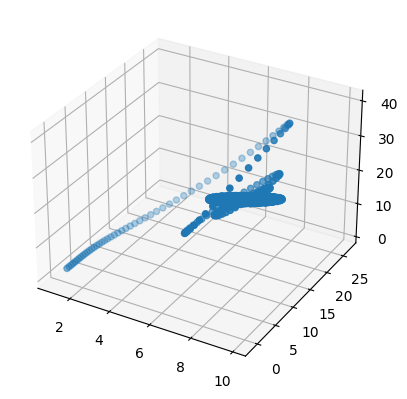

In [22]:
import scipy as sc
import numpy as np

from scipy.integrate import odeint


def lorenz(x,sigma=10,rho=28,beta=8/3,t=None):
    dxdt = sigma*(x[1]-x[0])
    dydt = x[0]*(rho-x[2])-x[1]
    dzdt = x[0]*x[1] - beta*x[2]
    return np.array([dxdt,dydt,dzdt])


c_0 = np.array([1,1,1])
#set time function for intervals
t = np.linspace(0,20,1000)

def odesolver(lorenz):
    return odeint(lorenz,c_0, t)
#wants it to be one dimensional 


from matplotlib import pyplot as plt
m = odesolver(lorenz)
xval = m[:,0]
yval = m[:,1]
zval = m[:,2]

plt.axes(projection='3d').scatter3D(xval,yval,zval,t)


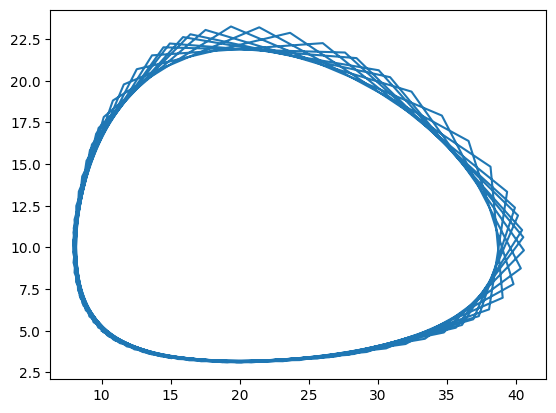

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

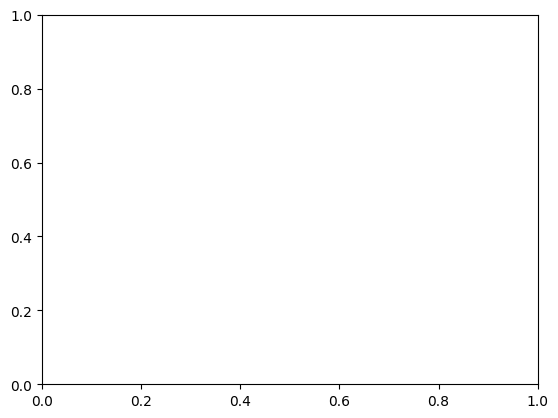

In [33]:
plt.plot(xval,yval)
plt.show()
plt.plot(xval,zval)
plt.show()
plt.plot(yval,zval)
plt.show()

Next is the Lotka-Volterray Equations, better known as the predator-prey equations. This set of differential equations describes the population growth of two linked species. Let describe the population of prey, and y be the population of predators. Then, we get that dx/dt = ax-bxy and dy/dt = cxy-dy, with a,b,c,d as constants. Let us formally define this as a function.

In [34]:

def prey_predator(x,t=None,a=1,b=0.1,c=0.075,d=1.5):
    dxdt = a*x[0]-b*x[0]*x[1]
    dydt = c*x[0]*x[1]-d*x[1]
    return np.array([dxdt,dydt])

Now, we wish to describe an initial condition for this function, as well as discretized time steps.

In [43]:
prpr_initial = np.array((10,5))
time = np.linspace(0,50,100)
arguments = (1,0.1,0.075,1.5)

Finally, the function will be inputted into the ODEsolver.

In [51]:
def odesolver2(prey_predator):
    return odeint(prey_predator,prpr_initial,time)

Visualizations of these differential equations are below:

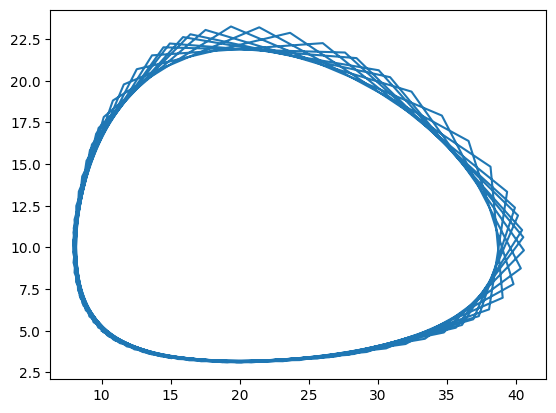

In [58]:
prpr_solution = odesolver2(prey_predator)
xval = prpr_solution[:,0]
yval = prpr_solution[:,1]
plt.plot(xval,yval)

Finally, we will consider the differential equations describing

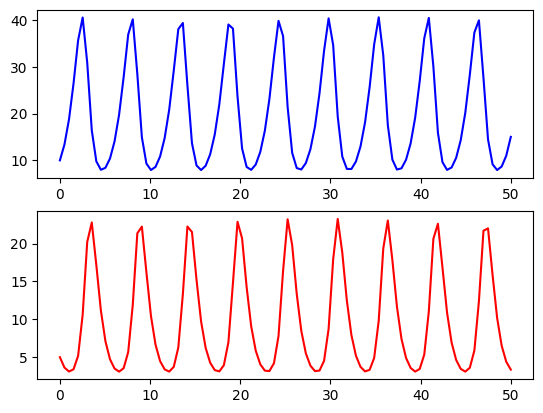

In [59]:
f,(ax1,ax2) = plt.subplots(2)

line1,  = ax1.plot(time,xval,color="b")
line2, = ax2.plot(time,yval, color="r")

This final model describes the rise of a hydrothermal plume based on salinity, area, vertical velocity, and temperature. The equations below were derived by my mentor, Dr. Victoria Preston. 

In [64]:
#code for last example
def pacific_sp_T(z):  # tbar
    """Function that produces the linear pacific standard T profile.
    From K. G. Speer and P. A. Rona. "A model of an Atlantic and Pacific
    hydrothermal plume," Journal of Geophysical Research: Oceans, vol.94,
    no. C5, pp.6213-6220, 1989.
    """
    tprof = 1.80 + 10**(-3) * z
    return tprof


def pacific_sp_S(z):  # sbar
    """Function that produces the linear pacific standard S profile.
    From K. G. Speer and P. A. Rona. "A model of an Atlantic and Pacific
    hydrothermal plume," Journal of Geophysical Research: Oceans, vol.94,
    no. C5, pp.6213-6220, 1989.
    """
    sprof = 34.608 - 10**(-4) * z
    return sprof


# Equation of state to compute density from S, T
def eos_rho(T, S):  # rhobar
    """Equation of state for density.
    From K. G. Speer and P. A. Rona. "A model of an Atlantic and Pacific
    hydrothermal plume," Journal of Geophysical Research: Oceans, vol.94,
    no. C5, pp.6213-6220, 1989.
    """
    temp = 2.13 * 10**(-4) * (T - 2.0)
    salt = 7.5 * 10**(-4) * (S - 34.89)
    return 1.041548 - temp + salt  # EOS
def speer_rona(v, z, rho_o, sbar, tbar, rhobar, E=0.255, g=-9.81):
    """The Speer and Rona numerical model for plumes.
    Developed from equations in:
    - K. G. Speer and P. A. Rona. "A model of
      an Atlantic and Pacific hydrothermal plume," Journal of
      Geophysical Research: Oceans, vol.94, no. C5, pp.6213-6220, 1989.
    - B. Morton, G. I. Taylor, and J. S. Turner, "Turbulent
      graviational convection from maintained and instantaneous sources,"
      Proceedings of the Royal Society of London. Series A. Mathematical
      and Physical Sciences, vol. 234, no. 1196, pp. 1-23, 1956.
    """
    V, A, S, T = v  # variables in the model
    rho = eos_rho(T, S)
    backT = tbar(z)
    backS = sbar(z)
    rhob = rhobar(backT, backS)
    dadz = 4 * E * np.sqrt(A) - (2 * g * A) / (rho_o * V**2) * (rho - rhob)
    dvdz = 2 * g / (2 * rho_o * V) * (rho - rhob) - dadz * V / (2 * A)
    dsdz = 2 * sbar(z) * E / np.sqrt(A) - dadz * S / A - dvdz * S / V
    dtdz = 2 * tbar(z) * E / np.sqrt(A) - dadz * T / A - dvdz * T / V
    return [dvdz, dadz, dsdz, dtdz]

In [68]:
params = (eos_rho(300,34.6), pacific_sp_S, pacific_sp_T, eos_rho, 0.7, 9.8)
init_cond = [0.5, 1, 34.6, 300]
sol = odeint(speer_rona, init_cond, time, args=params)

print(sol)

[[5.00000000e-001 1.00000000e+000 3.46000000e+001 3.00000000e+002]
 [2.01103621e-005 2.74610048e+004 3.46007565e+001 2.71787343e+002]
 [1.70546534e+256 6.93445740e-310 9.95922941e-143 6.93445740e-310]
 [7.34294815e+223 6.93445740e-310 4.98128925e+151 6.93445740e-310]
 [3.62610839e+228 6.93445740e-310 4.91056386e+025 6.93445740e-310]
 [1.71981201e+161 6.93445740e-310 9.85508858e+165 6.93445740e-310]
 [1.90154900e+136 6.93445740e-310 1.20386782e+049 6.93445740e-310]
 [4.19337932e+228 6.93445740e-310 9.82203932e+252 6.93445740e-310]
 [6.12743388e-154 2.61497480e-314 0.00000000e+000 4.91056506e+025]
 [4.45619116e-313 5.30498948e-313 9.77072573e+199 2.61510416e-314]
 [0.00000000e+000 4.11370233e+223 4.45619116e-313 5.30498948e-313]
 [1.94670262e+227 6.93445740e-310 1.91297068e+214 6.93445740e-310]
 [3.42134123e+180 6.93445740e-310 2.17719623e+016 6.93445740e-310]
 [3.82205699e+045 6.93445740e-310 6.01346930e-154 6.93445740e-310]
 [6.63226250e+265 6.93445740e-310 1.67501141e+243 6.93445740e-

In [69]:
def radius(Area):
    return np.sqrt(Area/np.pi)

Below is a graph of the resulting radius from a hydrothermal plume rising. 

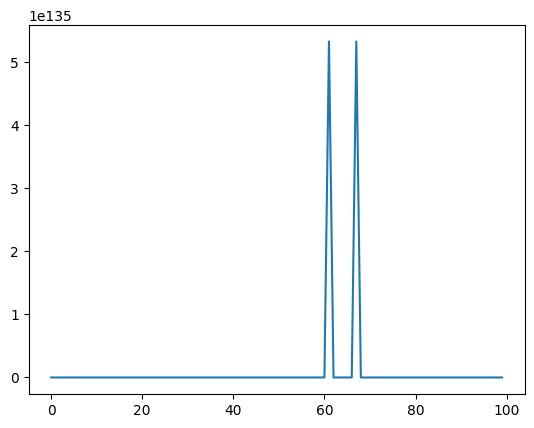

In [71]:
plt.plot(radius(sol[:,1]))

Below are the citations of the research papers I used to describe these systems:
Sparrow, C. (1982). Introduction and Simple Properties. In: The
     Lorenz Equations: Bifurcations, Chaos, and Strange Attractors. Applied Mathematical Sciences, vol 41. Springer, New York, NY. https://doi-org.libproxy.mit.edu/10.1007/978-1-4612-5767-7_1
Anisiu, Mira-Cristiana. (2014). Lotka, Volterra and their 
    model. Didactica Mathematica. 32. 9-17. 
Speer, Kevin G., and Peter A. Rona. “A Model of an Atlantic and 
    Pacific Hydrothermal Plume.” Journal of Geophysical Research 94.C5 (1989): 6213–6220. Web.